# Laboratorium 2


### Konfiguracja

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
from matplotlib.widgets import Button

class __Index(object):
    def __init__(self, scenes):
        self.i = 0
        self.scenes = scenes

    def set_axis(self, ax):
        self.ax = ax
        
    def next(self, event):
        self.i = (self.i + 1) % len(scenes)
        self.draw()

    def prev(self, event):
        self.i = (self.i - 1) % len(scenes)
        self.draw()
        
    def draw(self):
        self.ax.clear()
        for collection in scenes[self.i].points:
            self.ax.scatter(*zip(*collection.points), c=collection.color)
        for collection in scenes[self.i].lines:
            self.ax.add_collection(collection.collection)
        plt.draw()

def __configure_buttons(callback):
    plt.subplots_adjust(bottom=0.2)
    axprev = plt.axes([0.6, 0.05, 0.15, 0.075])
    axnext = plt.axes([0.76, 0.05, 0.15, 0.075])
    bnext = Button(axnext, 'Następny')
    bnext.on_clicked(callback.next)
    bprev = Button(axprev, 'Poprzedni')
    bprev.on_clicked(callback.prev)
    return [bprev, bnext]


### Interfejsy

In [2]:
class Scene:
    def __init__(self, points=[], lines=[]):
        self.points=points
        self.lines=lines

class PointsCollection:
    def __init__(self, points = [], color = None):
        self.points = np.array(points)
        self.color = color

class LinesCollection:
    def __init__(self, lines = [], color = None):
        if color:
            self.collection = mcoll.LineCollection(lines, [mcolors.to_rgba(color)] * len(lines))
        else:
            self.collection = mcoll.LineCollection(lines)
            
def draw(scenes):
    callback = __Index(scenes)
    widgets = __configure_buttons(callback)
    callback.set_axis(plt.axes())
    plt.show()
    callback.draw()
    return widgets

### Przykład użycia

<IPython.core.display.Javascript object>


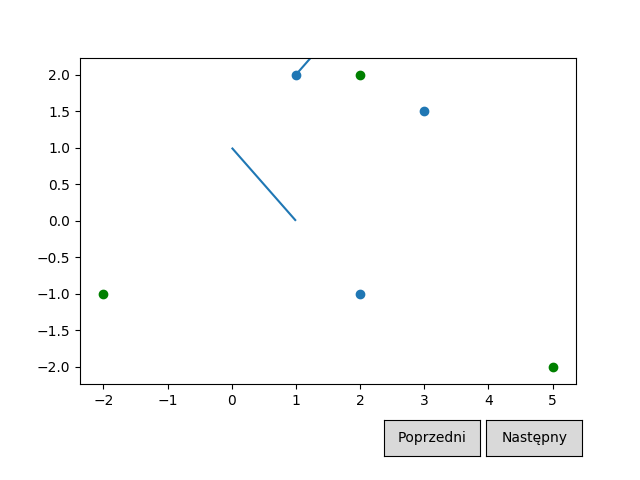

In [3]:
%matplotlib notebook

scenes=[Scene([PointsCollection([(1, 2), (3, 1.5), (2, -1)]), 
               PointsCollection([(5, -2), (2, 2), (-2, -1)], 'green')], 
              [LinesCollection([[(1,2),(2,3)], [(0,1),(1,0)]])]), 
        Scene([PointsCollection([(1, 2), (3, 1.5), (2, -1)], 'red'), 
               PointsCollection([(5, -2), (2, 2), (-2, 1)], 'black')], 
              [LinesCollection([[(-1,2),(-2,3)], [(0,-1),(-1,0)]])])]

widgets = draw(scenes) #You need to keep the reference to the result of draw(..) function.
